# DNN using Tensorflow

## *Predict Car Sales Pricing

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import tensorflow as tf
print(tf.__version__)

2.8.0


### 2. Import Dataset and View First 5 Rows

In [3]:
data_path = r"car_data.csv"
car_dataset = pd.read_csv(data_path, engine='python')
car_dataset.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### 3. Check for Missing Fields

In [4]:
# Will how the % of missing values for each variable
car_dataset.isnull().mean()

Unnamed: 0           0.000000
Name                 0.000000
Location             0.000000
Year                 0.000000
Kilometers_Driven    0.000000
Fuel_Type            0.000000
Transmission         0.000000
Owner_Type           0.000000
Mileage              0.000332
Engine               0.005981
Power                0.005981
Seats                0.006978
New_Price            0.863100
Price                0.000000
dtype: float64

### 4. Remove Unuseful Data

In [5]:
# Will remove the New_Price column and Unnamed column from dataset. They are not useful 
car_dataset = car_dataset.drop(['Unnamed: 0', 'New_Price'], axis = 1)

### 5. Plot Relationships Between the Independent Variables and Response Variable

<AxesSubplot:>

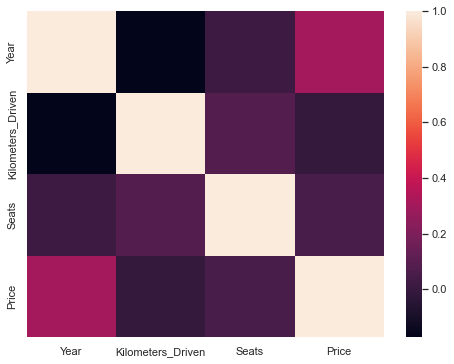

In [6]:
# Plots a heatmap shwoing a relationship between all the numerical columns in the dataset
plt.rcParams["figure.figsize"] = [8, 6]
sns.heatmap(car_dataset.corr())

### Heat shows a slight positive correlation between the Year and Price columns. This makes sense as newer cars are normally expensive compared to older cars.

### 6. Histogram to show frequency of variables

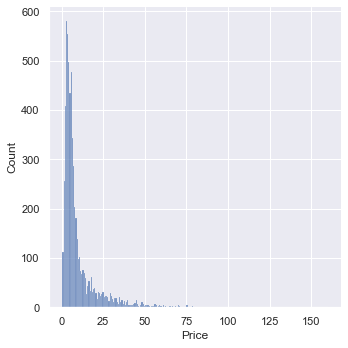

In [7]:
sns.displot(car_dataset['Price'])

### The output shows that most of the cars are priced between 2.5 to 7.5 hundred thousand. The unit of the price mentioned in the price column is one hundred thousand.

## 7. Convert Categorical Data to Numeric

In [8]:
#View the number of unique values in different columns
car_dataset.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

In [9]:
car_dataset.count()

Name                 6019
Location             6019
Year                 6019
Kilometers_Driven    6019
Fuel_Type            6019
Transmission         6019
Owner_Type           6019
Mileage              6017
Engine               5983
Power                5983
Seats                5977
Price                6019
dtype: int64

In [10]:
# View data types for each columns
print(car_dataset.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object


In [11]:
# View only the numerical columns in the dataset
numerical_data = car_dataset.drop(['Name', 'Location','Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power'], axis=1)
numerical_data.head()

,Year,Kilometers_Driven,Seats,Price
0,2010,72000,5.0,1.75
1,2015,41000,5.0,12.50
2,2011,46000,5.0,4.50
3,2012,87000,7.0,6.00
4,2013,40670,5.0,17.74


In [12]:
# Create new table for the categorical columns
categorical_data = car_dataset.filter(['Location','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power'], axis=1)
categorical_data.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
0,Mumbai,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp
1,Pune,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp
2,Chennai,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp
3,Chennai,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp
4,Coimbatore,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp


In [13]:
categorical_data.nunique()

Location         11
Fuel_Type         5
Transmission      2
Owner_Type        4
Mileage         442
Engine          146
Power           372
dtype: int64

In [14]:
# Converts categorical columns into one hot encoded columns using the pd.get_dummies() method
categorical_data__one_hot = pd.get_dummies(categorical_data, drop_first= True)
categorical_data__one_hot.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Will combine the numeric data table and the categorical/numeric table into one dataframe
complete_dataset = pd.concat([numerical_data, categorical_data__one_hot], axis=1)
complete_dataset.head()

,Year,Kilometers_Driven,Seats,Price,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,...,Power_97.6 bhp,Power_97.7 bhp,Power_98.59 bhp,Power_98.6 bhp,Power_98.79 bhp,Power_98.82 bhp,Power_98.96 bhp,Power_99 bhp,Power_99.6 bhp,Power_null bhp
0,2010,72000,5.0,1.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,12.50,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011,46000,5.0,4.50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2012,87000,7.0,6.00,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,40670,5.0,17.74,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# View columns with null values
complete_dataset.isnull().mean()

Year                  0.000000
Kilometers_Driven     0.000000
Seats                 0.006978
Price                 0.000000
Location_Bangalore    0.000000
                        ...   
Power_98.82 bhp       0.000000
Power_98.96 bhp       0.000000
Power_99 bhp          0.000000
Power_99.6 bhp        0.000000
Power_null bhp        0.000000
Length: 979, dtype: float64

In [17]:
# Removes any rows that contain null values
complete_dataset.dropna(inplace = True)

## Dividing Data into Training and Test Sets

In [18]:
# Divid the dataset into features and labels.
x = complete_dataset.drop(['Price'], axis=1)
y = complete_dataset['Price']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=20)

In [20]:
# Scale the feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create and Training Neural Network Model with Tensorflow Keras

In [21]:
# Import classes and modules from Tensorflow and Keras
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [22]:
# Describes the shape/layers of the neural network
input_layer = Input(shape=(x.shape[1],))
dense_layer0 = Dense(100, activation='relu')(input_layer)
dense_layer1 = Dense(50, activation='relu')(dense_layer0)
dense_layer2 = Dense(25, activation='relu')(dense_layer1)
dense_layer3 = Dense(10, activation='relu')(dense_layer2)
dense_layer4 = Dense(5, activation='relu')(dense_layer3)
dense_layer5 = Dense(2, activation='relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [23]:
# Will create a neural network model with the Model class from tensorflow.keras.models module
model = Model(inputs = input_layer, outputs=output)
model.compile(loss="mean_absolute_error", optimizer="adam",metrics=["mean_absolute_error"])

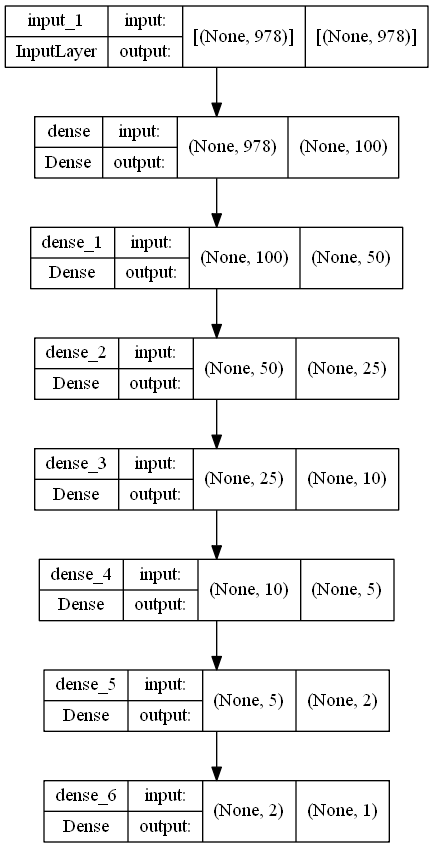

In [24]:
# Plot and view model
import pydot
import graphviz
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the DNN Model

In [25]:
history = model.fit(x_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
765/765 [==============================] - 2s 2ms/step - loss: 3.6418 - mean_absolute_error: 3.6418 - val_loss: 2.3800 - val_mean_absolute_error: 2.3800
Epoch 2/5
765/765 [==============================] - 1s 1ms/step - loss: 2.1339 - mean_absolute_error: 2.1339 - val_loss: 2.1022 - val_mean_absolute_error: 2.1022
Epoch 3/5
765/765 [==============================] - 1s 1ms/step - loss: 1.8032 - mean_absolute_error: 1.8032 - val_loss: 2.3546 - val_mean_absolute_error: 2.3546
Epoch 4/5
765/765 [==============================] - 1s 2ms/step - loss: 1.6221 - mean_absolute_error: 1.6221 - val_loss: 2.0329 - val_mean_absolute_error: 2.0329
Epoch 5/5
765/765 [==============================] - 1s 1ms/step - loss: 1.5582 - mean_absolute_error: 1.5582 - val_loss: 2.0678 - val_mean_absolute_error: 2.0678


# Evaluating the Performance of the NN Model

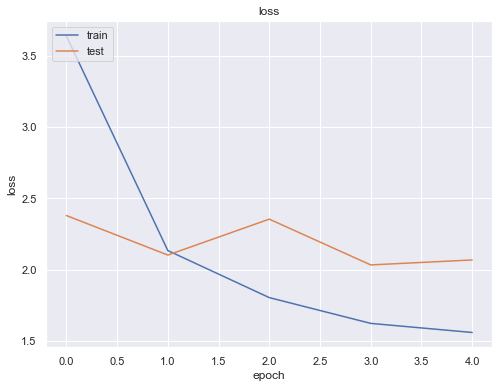

In [26]:
# Plot the training and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

##### The above output shows that while the training loss keeps decreasing till the fifth epoch, the test or validation loss shows fluctuation after the second epoch, which shows that the model is slightly overfitting.

In [27]:
y_pred = model.predict(x_test)

In [28]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.9019238032106571
Mean Squared Error: 19.76556263578868
Root Mean Squared Error: 4.445847797191069


In [29]:
car_dataset['Price'].mean()

9.479468350224273

#### Plot the actual and predicted values side-by-side

In [30]:
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})
comparison_df

,Actual,Predicted
0,8.25,[7.951578140258789]
1,5.08,[4.263474464416504]
2,4.50,[6.924957752227783]
3,28.50,[38.90064239501953]
4,7.25,[11.561491012573242]
...,...,...
1191,7.50,[5.8726019859313965]
1192,21.67,[21.643573760986328]
1193,4.60,[3.6875834465026855]
1194,8.00,[14.362931251525879]


# Make Predictions on Single Data Point

In [31]:
#Print the first record/index in the test set
#Output below shows the single record has one dimension
x_test[1].shape

(978,)

##### The feature vector for a record should be in the form of a row vector if you wish to make a prediction on a single record

In [32]:
# Will convert the feature vector into a row vector using the reshape(1,-1) method
single_point = x_test[1].reshape(1,-1)
single_point.shape

(1, 978)

In [33]:
# Will pass the newly formed row feature vector to the predict() method of the trained neural network model
model.predict(x_test[1].reshape(1,-1))

array([[4.2634745]], dtype=float32)

###### The price predicted 4.55 hundred thousand

In [34]:
# Will print the actual price
y_test.values[1]

5.08

In [50]:
print("\n The prediction was off by {}.".format(float(y_test.values[1] - model.predict(x_test[1].reshape(1,-1)))))


 The prediction was off by 0.8165254592895508.


##### 2. Single prediction 

In [51]:
x_test[3].shape

(978,)

In [52]:
single_point_2 = x_test[3].reshape(1,-1)
single_point_2.shape

(1, 978)

In [53]:
model.predict(x_test[3].reshape(1,-1))

array([[38.90064]], dtype=float32)

In [54]:
y_test.values[3]

28.5

In [55]:
print("\n The prediction was off by {}.".format(float(y_test.values[3] - model.predict(x_test[3].reshape(1,-1)))))


 The prediction was off by -10.400638580322266.


##### 3. Single record prediction

In [56]:
x_train[30].shape

(978,)

In [60]:
single_point_3 = x_test[30].reshape(1,-1)
single_point_3.shape

(1, 978)

In [61]:
model.predict(x_test[30].reshape(1,-1))

array([[7.702709]], dtype=float32)

In [62]:
y_test.values[30]

8.65

In [63]:
print("\n The prediction was off by {}.".format(float(y_test.values[30] - model.predict(x_test[30].reshape(1,-1)))))


 The prediction was off by 0.9472904205322266.
